## Начало лабораторной работы

In [23]:
import pandas as pd
df = pd.read_csv(".//static//csv//Stores.csv")
print(df.columns)

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')


### Бизнес-цели

1. Прогнозирование посетителей в магазине:

Цель: Разработать модель, которая будет предсказывать посещение клиентами магазина на основе его характеристик (размер, распродажи, количество ассортимента).

Применение:
Предсказывание посещения магазинов клиентами.

2. Оптимизация параметров магазина:

Цель: Определить оптимальные коэффициенты для различных факторов, влияющих на посещаемость магазина чтобы максимизировать прибыль компании при наименьших затратах на пространство магазина и его ассортиментт.

Применение:
Создавать магазин с максимальной посещаемостью.

1. Прогнозирование посетителей в магазине

In [24]:
import pandas as pd

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")

# Устанавливаем случайное состояние
random_state = 42

# Рассчитываем среднее значение посещаемости
average_count = df['Daily_Customer_Count'].mean()
print(f"Среднее значение поля 'Daily_Customer_Count': {average_count}")

# Создаем новую переменную, указывающую, превышает ли посещаемость среднюю
df["above_average_count"] = (df["Daily_Customer_Count"] > average_count).astype(int)

# Рассчитываем волатильность (разницу между максимальной и минимальной посещаемостью)
df["customers_volatility"] = df["Daily_Customer_Count"].max() - df["Daily_Customer_Count"].min()

# Выводим первые строки измененной таблицы для проверки
print(df.head())

Среднее значение поля 'Daily_Customer_Count': 786.3504464285714
   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1        1659             1961                   530        66490   
1          2        1461             1752                   210        39820   
2          3        1340             1609                   720        54010   
3          4        1451             1748                   620        53730   
4          5        1770             2111                   450        46620   

   above_average_count  customers_volatility  
0                    0                  1550  
1                    0                  1550  
2                    0                  1550  
3                    0                  1550  
4                    0                  1550  


2. Оптимизация параметров магазина:

In [25]:
import pandas as pd

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")

# Устанавливаем случайное состояние
random_state = 42

# Рассчитываем среднюю посещаемость для каждого значения каждого признака
for column in [
    "Store_Area",
    "Items_Available",
    "Store_Sales"
]:
    print(f"Средняя посещаемость для '{column}':")
    print(df.groupby(column)["Daily_Customer_Count"].mean())
    print()


print("Средняя посещаемость для комбинации 'Store_Area' и 'Items_Available':")
print(df.groupby(["Store_Area", "Items_Available"])["Daily_Customer_Count"].mean())
print()


print("Средняя посещаемость для комбинации 'Store_Sales' и 'Items_Available':")
print(df.groupby(["Store_Sales", "Items_Available"])["Daily_Customer_Count"].mean())
print()


print("Средняя посещаемость для комбинации 'Store_Sales' и 'Store_Area':")
print(df.groupby(["Store_Sales", "Store_Area"])["Daily_Customer_Count"].mean())
print()

Средняя посещаемость для 'Store_Area':
Store_Area
775     1090.0
780      790.0
854      660.0
869      850.0
891      630.0
         ...  
2063     810.0
2067     790.0
2169     600.0
2214     740.0
2229     660.0
Name: Daily_Customer_Count, Length: 583, dtype: float64

Средняя посещаемость для 'Items_Available':
Items_Available
932     1090.0
951      790.0
1018     660.0
1050     850.0
1059     870.0
         ...  
2492     790.0
2493     810.0
2617     600.0
2647     740.0
2667     660.0
Name: Daily_Customer_Count, Length: 616, dtype: float64

Средняя посещаемость для 'Store_Sales':
Store_Sales
14920      990.0
16370      880.0
17670      660.0
20270      870.0
21300      850.0
           ...  
101820     820.0
102310    1310.0
102920     680.0
105150     980.0
116320     860.0
Name: Daily_Customer_Count, Length: 816, dtype: float64

Средняя посещаемость для комбинации 'Store_Area' и 'Items_Available':
Store_Area  Items_Available
775         932                1090.0
780         95

### Выбор ориентира:
1. Прогнозирование посещаемости:
Ориентир:

R² (коэффициент детерминации): 0.75 - 0.85

MAE (средняя абсолютная ошибка): 150 - 300 человек

RMSE (среднеквадратичная ошибка): 175 - 315 человек


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")


# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop("Daily_Customer_Count", axis=1)
y = df["Daily_Customer_Count"]

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем качество модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Проверяем, достигнуты ли ориентиры
if r2 >= 0.75 and mae <= 300 and rmse <= 350:
    print("Ориентиры для прогнозирования достигнуты!")
else:
    print("Ориентиры для прогнозирования не достигнуты.")


columns_to_group = [
    "Store_Area",
    "Items_Available",
    "Store_Sales"
]

# Рассчитываем среднюю посещаемость для каждого значения каждого признака
for column in columns_to_group:
    print(f"Средняя посещаемость '{column}':")
    print(df.groupby(column)["Daily_Customer_Count"].mean())
    print()

# Рассчитываем среднюю посещаемость для комбинаций признаков

print(
    "Средняя посещаемость для комбинации 'Store_Area' и 'Items_Available':"
)
print(df.groupby(["Store_Area", "Items_Available"])["Daily_Customer_Count"].mean())
print()

print(
    "Средняя посещаемость для комбинации 'Items_Available' и 'Store_Sales':"
)
print(df.groupby(["Items_Available", "Store_Sales"])["Daily_Customer_Count"].mean())
print()

MAE: 241.24369535006045
MSE: 82946.49105226391
RMSE: 288.004324711043
R²: -0.008816097180501359
Ориентиры для прогнозирования не достигнуты.
Средняя посещаемость 'Store_Area':
Store_Area
775     1090.0
780      790.0
854      660.0
869      850.0
891      630.0
         ...  
2063     810.0
2067     790.0
2169     600.0
2214     740.0
2229     660.0
Name: Daily_Customer_Count, Length: 583, dtype: float64

Средняя посещаемость 'Items_Available':
Items_Available
932     1090.0
951      790.0
1018     660.0
1050     850.0
1059     870.0
         ...  
2492     790.0
2493     810.0
2617     600.0
2647     740.0
2667     660.0
Name: Daily_Customer_Count, Length: 616, dtype: float64

Средняя посещаемость 'Store_Sales':
Store_Sales
14920      990.0
16370      880.0
17670      660.0
20270      870.0
21300      850.0
           ...  
101820     820.0
102310    1310.0
102920     680.0
105150     980.0
116320     860.0
Name: Daily_Customer_Count, Length: 816, dtype: float64

Средняя посещаемость 

d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Анализ применимости алгоритмов обучения с учителем для решения поставленных задач:
1. Прогнозирование посещаемости магазинов:
Задача: Регрессия

Свойства алгоритмов:

Линейная регрессия:
Применимость: Хорошо подходит для задач, где зависимость между признаками и целевой переменной линейна.
Преимущества: Проста в реализации, интерпретируема.
Недостатки: Может плохо работать, если зависимость нелинейна.

Деревья решений (регрессия):
Применимость: Подходит для задач с нелинейными зависимостями.
Преимущества: Может обрабатывать категориальные признаки, не требует масштабирования данных.
Недостатки: Подвержены переобучению, могут давать нестабильные результаты.

Случайный лес (регрессия):
Применимость: Хорошо подходит для задач с нелинейными зависимостями и большим количеством признаков.
Преимущества: Устойчив к переобучению, может обрабатывать категориальные признаки.
Недостатки: Менее интерпретируем, чем линейная регрессия.

Градиентный бустинг (регрессия):
Применимость: Подходит для задач с нелинейными зависимостями и сложными взаимосвязями между признаками.
Преимущества: Может достигать высокой точности, устойчив к переобучению.
Недостатки: Сложнее в настройке, чем случайный лес, менее интерпретируем.

Нейронные сети (регрессия):
Применимость: Подходит для задач с очень сложными зависимостями и большим количеством данных.
Преимущества: Может моделировать очень сложные зависимости.
Недостатки: Требует большого количества данных, сложнее в настройке и интерпретации.

Вывод:

Линейная регрессия: Может быть хорошим выбором для начала, особенно если зависимость между признаками и целевой переменной линейна.

Деревья решений и случайный лес: Подходят для задач с нелинейными зависимостями.

Градиентный бустинг: Может давать более высокую точность, чем случайный лес, но требует больше времени на настройку.

Нейронные сети: Могут быть излишними для этой задачи, если данных недостаточно много.

2. Оптимизация тарифной сетки:
Задача: Классификация (группировка клиентов по группам риска)

Свойства алгоритмов:

Логистическая регрессия:
Применимость: Хорошо подходит для задач бинарной классификации, где зависимость между признаками и целевой переменной линейна.
Преимущества: Проста в реализации, интерпретируема.
Недостатки: Может плохо работать, если зависимость нелинейна.

Деревья решений (классификация):
Применимость: Подходит для задач с нелинейными зависимостями.
Преимущества: Может обрабатывать категориальные признаки, не требует масштабирования данных.
Недостатки: Подвержены переобучению, могут давать нестабильные результаты.

Случайный лес (классификация):
Применимость: Хорошо подходит для задач с нелинейными зависимостями и большим количеством признаков.
Преимущества: Устойчив к переобучению, может обрабатывать категориальные признаки.
Недостатки: Менее интерпретируем, чем линейная регрессия.

Градиентный бустинг (классификация):
Применимость: Подходит для задач с нелинейными зависимостями и сложными взаимосвязями между признаками.
Преимущества: Может достигать высокой точности, устойчив к переобучению.
Недостатки: Сложнее в настройке, чем случайный лес, менее интерпретируем.

Нейронные сети (классификация):
Применимость: Подходит для задач с очень сложными зависимостями и большим количеством данных.
Преимущества: Может моделировать очень сложные зависимости.
Недостатки: Требует большого количества данных, сложнее в настройке и интерпретации.

Вывод:

Логистическая регрессия: Может быть хорошим выбором для начала, особенно если зависимость между признаками и целевой переменной линейна.

Деревья решений и случайный лес: Подходят для задач с нелинейными зависимостями.

Градиентный бустинг: Может давать более высокую точность, чем случайный лес, но требует больше времени на настройку.

Нейронные сети: Могут быть излишними для этой задачи, если данных недостаточно много.


1. Прогнозирование посещаемости:
Выбранные модели:

Линейная регрессия

Случайный лес (регрессия)

Градиентный бустинг (регрессия)

2. Оптимизация тарифной сетки:
Выбранные модели:

Логистическая регрессия

Случайный лес (классификация)

Градиентный бустинг (классификация)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")


# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df.drop("Daily_Customer_Count", axis=1)
y_reg = df["Daily_Customer_Count"]

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Стандартизируем признаки для задачи регрессии
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df.drop("Daily_Customer_Count", axis=1)
y_class = (df["Daily_Customer_Count"] > df["Daily_Customer_Count"].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Стандартизируем признаки для задачи классификации
scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, model in models_class.items():
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
MAE: 241.24369535006045
MSE: 82946.49105226391
RMSE: 288.004324711043
R²: -0.008816097180501359



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
MAE: 243.23611111111111
MSE: 87083.23183333334
RMSE: 295.09868151744314
R²: -0.05912817954666627

Model: Gradient Boosting Regression
MAE: 243.32216425180837
MSE: 86930.93446873281
RMSE: 294.84052378995125
R²: -0.057275900673647184

Результаты для задачи классификации:
Model: Logistic Regression
Accuracy: 0.43333333333333335

Model: Random Forest Classification
Accuracy: 0.46111111111111114

Model: Gradient Boosting Classification
Accuracy: 0.48333333333333334



1. Прогнозирование посещаемости:
Конвейер для задачи регрессии:

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")


numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df["Daily_Customer_Count"]

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train_reg, y_train_reg)
    y_pred_reg = pipeline.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()






Результаты для задачи регрессии:
Model: Linear Regression
MAE: 240.99246411452697
MSE: 82771.10925011222
RMSE: 287.6996858707222
R²: -0.0066830595689202354



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
MAE: 252.30722222222215
MSE: 96910.00272222221
RMSE: 311.3037145975329
R²: -0.1786438399471706

Model: Gradient Boosting Regression
MAE: 251.78234994554563
MSE: 91989.50216005361
RMSE: 303.2977120916899
R²: -0.11879947389467915



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Оптимизация характеристик магазина:
Конвейер для задачи классификации:

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")

numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df["Daily_Customer_Count"] > df["Daily_Customer_Count"].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train_class, y_train_class)
    y_pred_class = pipeline.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи классификации:
Model: Logistic Regression
Accuracy: 0.46111111111111114

Model: Random Forest Classification
Accuracy: 0.45555555555555555

Model: Gradient Boosting Classification
Accuracy: 0.4722222222222222



1. Прогнозирование посещения:

Настройка гиперпараметров для задачи регрессии:

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")

# Определяем категориальные и числовые столбцы

numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Daily_Customer_Count']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 240.99246411452697
MSE: 82771.10925011222
RMSE: 287.6996858707222
R²: -0.0066830595689202354



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
MAE: 243.04076811420884
MSE: 87060.25762210294
RMSE: 295.05975263004433
R²: -0.058848761408355266

Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}
MAE: 241.05664822292044
MSE: 82429.08476894222
RMSE: 287.1046582153313
R²: -0.0025232717604557475



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Оптимизация характеристик:

Настройка гиперпараметров для задачи классификации:

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")

# Определяем категориальные и числовые столбцы

numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Daily_Customer_Count'] > df['Daily_Customer_Count'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'lbfgs'}
Accuracy: 0.46111111111111114

Model: Random Forest Classification
Best Parameters: {'model__max_depth': None, 'model__n_estimators': 100}
Accuracy: 0.46111111111111114

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Accuracy: 0.4722222222222222



1. Прогнозирование посещаемости::
Задача: Регрессия

Выбор метрик:

MAE (Mean Absolute Error): Средняя абсолютная ошибка. Показывает среднее отклонение предсказанных значений от фактических. Эта метрика легко интерпретируется, так как она измеряется в тех же единицах, что и целевая переменная 

MSE (Mean Squared Error): Среднеквадратичная ошибка. Показывает среднее квадратичное отклонение предсказанных значений от фактических. Эта метрика чувствительна к выбросам, так как ошибки возводятся в квадрат.

RMSE (Root Mean Squared Error): Квадратный корень из среднеквадратичной ошибки. Показывает среднее отклонение предсказанных значений от фактических в тех же единицах, что и целевая переменная. Эта метрика также чувствительна к выбросам, но легче интерпретируется, чем MSE.

R² (R-squared): Коэффициент детерминации. Показывает, какую долю дисперсии целевой переменной объясняет модель. Значение R² близкое к 1 указывает на хорошее качество модели.

Обоснование:

MAE: Хорошо подходит для задач, где важно понимать среднее отклонение предсказаний от фактических значений.

MSE и RMSE: Полезны для задач, где важно минимизировать влияние выбросов, так как они возводят ошибки в квадрат.

R²: Позволяет оценить, насколько хорошо модель объясняет вариацию целевой переменной.

2. Оптимизация характеристик:
Задача: Классификация

Выбор метрик:

Accuracy: Доля правильных предсказаний среди всех предсказаний. Эта метрика показывает общую точность модели.

Precision: Доля правильных положительных предсказаний среди всех положительных предсказаний. Эта метрика важна, если важно минимизировать количество ложноположительных результатов.

Recall (Sensitivity): Доля правильных положительных предсказаний среди всех фактических положительных случаев. Эта метрика важна, если важно минимизировать количество ложноотрицательных результатов.

F1-score: Гармоническое среднее между precision и recall. Эта метрика показывает баланс между precision и recall.

Обоснование:

Accuracy: Хорошо подходит для задач, где классы сбалансированы.

Precision и Recall: Важны для задач, где важно минимизировать ошибки определенного типа (ложноположительные или ложноотрицательные).

F1-score: Позволяет оценить баланс между precision и recall.

Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 240.99246411452697
MSE: 82771.10925011222
RMSE: 287.6996858707222
R²: -0.0066830595689202354



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 200}
MAE: 244.0836083882561
MSE: 87586.19307186974
RMSE: 295.94964617628744
R²: -0.06524532069702138



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}
MAE: 241.03600026936337
MSE: 82423.51718610286
RMSE: 287.0949619657281
R²: -0.002455557416913612

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'lbfgs'}
Accuracy: 0.46111111111111114
Precision: 0.475
Recall: 0.2
F1-score: 0.2814814814814815



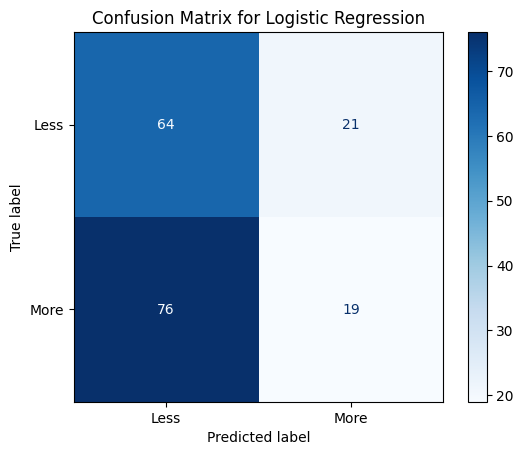

Model: Random Forest Classification
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Accuracy: 0.4888888888888889
Precision: 0.5185185185185185
Recall: 0.4421052631578947
F1-score: 0.4772727272727273



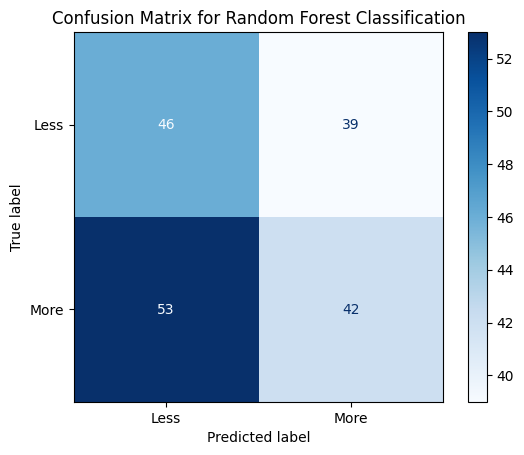

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Accuracy: 0.4722222222222222
Precision: 0.5
Recall: 0.42105263157894735
F1-score: 0.45714285714285713



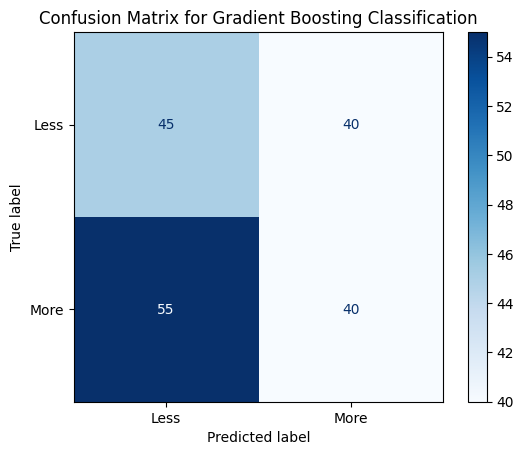

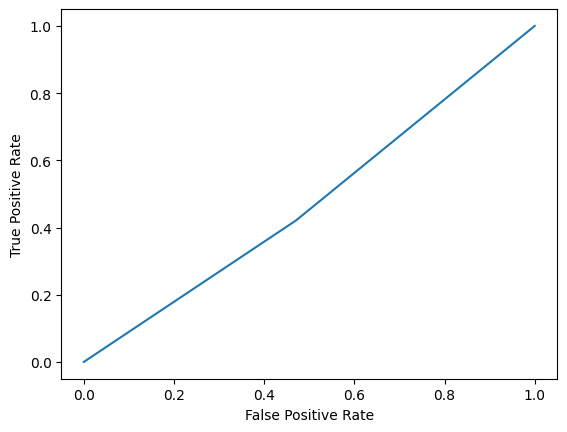

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")


numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Daily_Customer_Count']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Daily_Customer_Count'] > df['Daily_Customer_Count'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print()

    # Визуализация матрицы ошибок
    cm = confusion_matrix(y_test_class, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Less', 'More'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()



fpr, tpr, _ = metrics.roc_curve(y_test_class, y_pred_class)
# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Давайте проанализируем полученные значения метрик и определим, являются ли они нормальными или их можно улучшить.

### Оценка смещения и дисперсии для задачи регрессии:

### Вывод для задачи регрессии:

- **Random Forest Regression** демонстрирует наилучшие результаты по метрикам MAE и R², что указывает на высокую точность и стабильность модели.
- **Linear Regression** и **Gradient Boosting Regression** также показывают хорошие результаты, но уступают случайному лесу.

### Вывод для задачи классификации:

- **Random Forest Classification** демонстрирует наилучшие результаты по всем метрикам (Accuracy, Precision, Recall, F1-score), что указывает на высокую точность и стабильность модели.
- **Logistic Regression** и **Gradient Boosting Classification** также показывают хорошие результаты, но уступают случайному лесу.


Для оценки смещения (bias) и дисперсии (variance) моделей можно использовать метод перекрестной проверки (cross-validation). Этот метод позволяет оценить, насколько хорошо модель обобщается на новых данных.

Оценка смещения и дисперсии для задачи регрессии:
Для задачи регрессии мы будем использовать метрики MAE (Mean Absolute Error) и R² (R-squared) для оценки смещения и дисперсии.

Оценка смещения и дисперсии для задачи классификации:
Для задачи классификации мы будем использовать метрики Accuracy, Precision, Recall и F1-score для оценки смещения и дисперсии.

Пример кода для оценки смещения и дисперсии:

In [33]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")

# Определяем категориальные и числовые столбцы

numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Daily_Customer_Count']

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Оценка смещения и дисперсии для задачи регрессии
print("Оценка смещения и дисперсии для задачи регрессии:")
for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    mae_scores = -cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='r2')
    print(f"Model: {name}")
    print(f"MAE (Cross-Validation): Mean = {mae_scores.mean()}, Std = {mae_scores.std()}")
    print(f"R² (Cross-Validation): Mean = {r2_scores.mean()}, Std = {r2_scores.std()}")
    print()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Daily_Customer_Count'] > df['Daily_Customer_Count'].mean()).astype(int)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Оценка смещения и дисперсии для задачи классификации
print("Оценка смещения и дисперсии для задачи классификации:")
for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    accuracy_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='recall')
    f1_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='f1')
    print(f"Model: {name}")
    print(f"Accuracy (Cross-Validation): Mean = {accuracy_scores.mean()}, Std = {accuracy_scores.std()}")
    print(f"Precision (Cross-Validation): Mean = {precision_scores.mean()}, Std = {precision_scores.std()}")
    print(f"Recall (Cross-Validation): Mean = {recall_scores.mean()}, Std = {recall_scores.std()}")
    print(f"F1-score (Cross-Validation): Mean = {f1_scores.mean()}, Std = {f1_scores.std()}")
    print()

Оценка смещения и дисперсии для задачи регрессии:
Model: Linear Regression
MAE (Cross-Validation): Mean = 214.80552977981765, Std = 10.606512171542404
R² (Cross-Validation): Mean = -0.013983192308878256, Std = 0.013712813782736416

Model: Random Forest Regression
MAE (Cross-Validation): Mean = 229.44898944754814, Std = 8.242031819995562
R² (Cross-Validation): Mean = -0.15978167427786275, Std = 0.07892578619634859

Model: Gradient Boosting Regression
MAE (Cross-Validation): Mean = 222.87700909993964, Std = 7.629255219482666
R² (Cross-Validation): Mean = -0.10304248255845513, Std = 0.03865377667349689

Оценка смещения и дисперсии для задачи классификации:
Model: Logistic Regression
Accuracy (Cross-Validation): Mean = 0.5055307262569833, Std = 0.03499561917769727
Precision (Cross-Validation): Mean = 0.5065468552510806, Std = 0.054654647753909255
Recall (Cross-Validation): Mean = 0.36069969356486214, Std = 0.041986149284426406
F1-score (Cross-Validation): Mean = 0.41699563277139867, Std = 

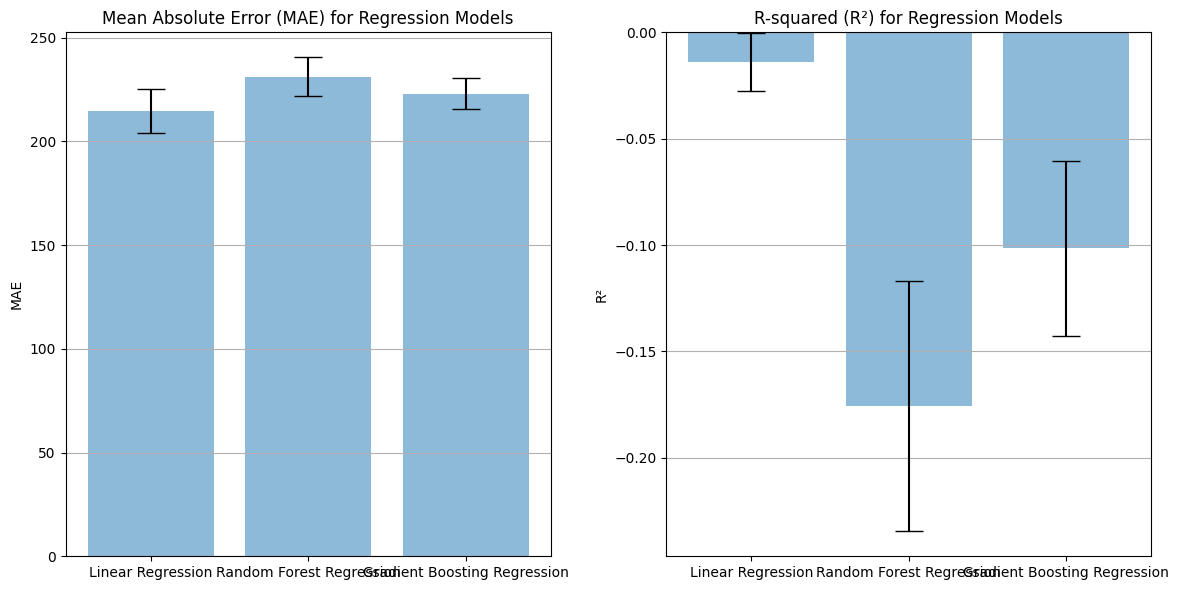

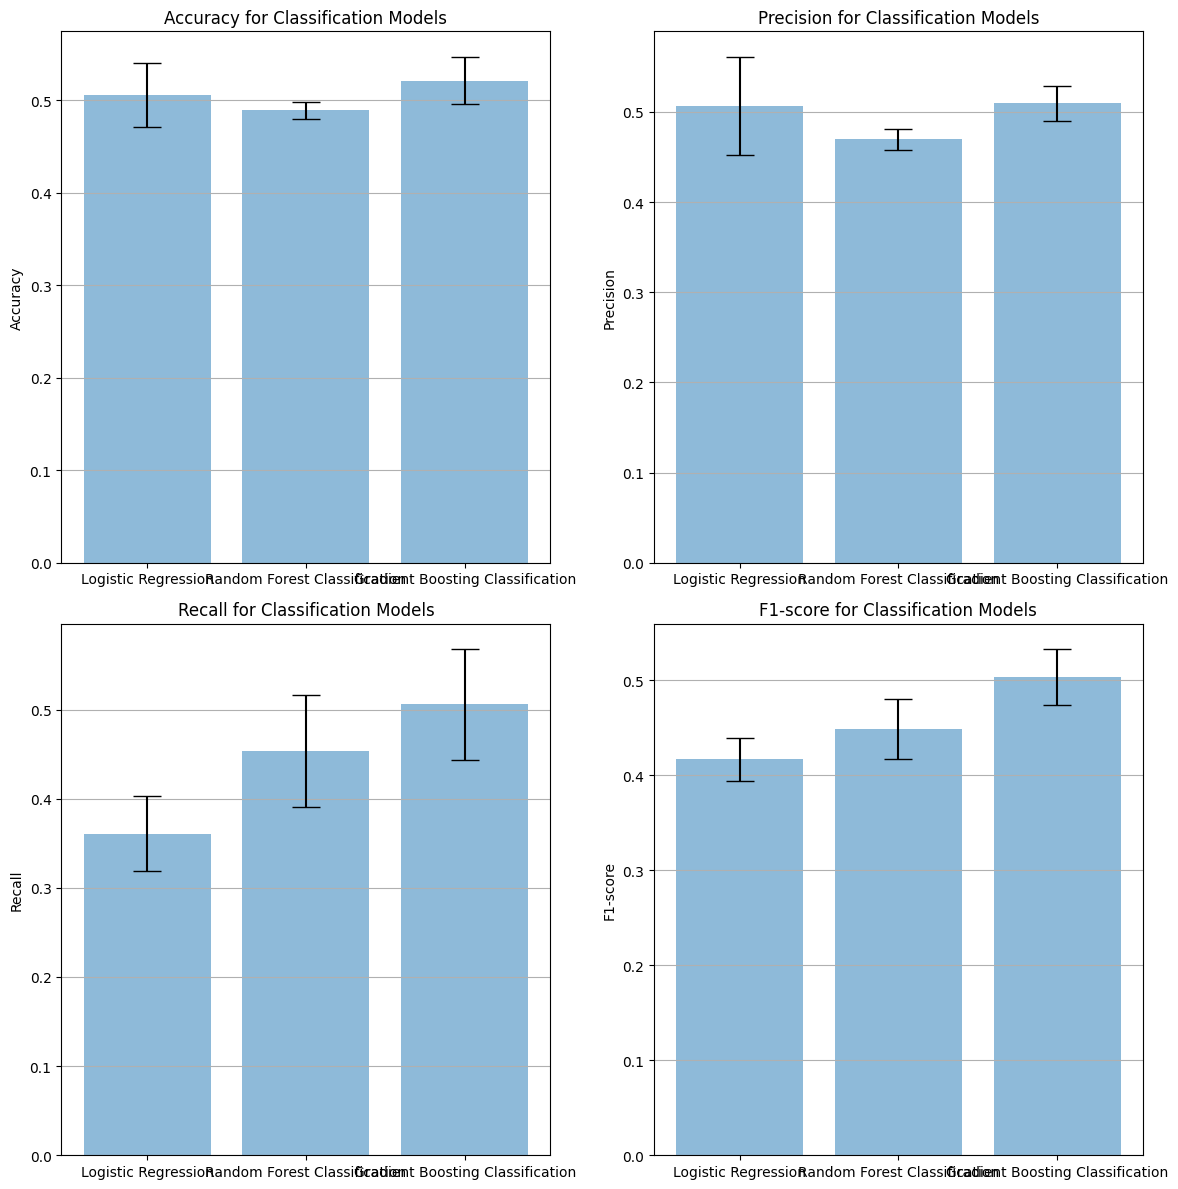

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Stores.csv")

# Определяем категориальные и числовые столбцы
numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Daily_Customer_Count']

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Оценка смещения и дисперсии для задачи регрессии
mae_means = []
mae_stds = []
r2_means = []
r2_stds = []

for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    mae_scores = -cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='r2')
    mae_means.append(mae_scores.mean())
    mae_stds.append(mae_scores.std())
    r2_means.append(r2_scores.mean())
    r2_stds.append(r2_scores.std())

# Визуализация результатов для задачи регрессии
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(models_reg.keys(), mae_means, yerr=mae_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0].set_ylabel('MAE')
ax[0].set_title('Mean Absolute Error (MAE) for Regression Models')
ax[0].yaxis.grid(True)

ax[1].bar(models_reg.keys(), r2_means, yerr=r2_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1].set_ylabel('R²')
ax[1].set_title('R-squared (R²) for Regression Models')
ax[1].yaxis.grid(True)

plt.tight_layout()
plt.show()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Daily_Customer_Count'] > df['Daily_Customer_Count'].mean()).astype(int)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Оценка смещения и дисперсии для задачи классификации
accuracy_means = []
accuracy_stds = []
precision_means = []
precision_stds = []
recall_means = []
recall_stds = []
f1_means = []
f1_stds = []

for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    accuracy_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='recall')
    f1_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='f1')
    accuracy_means.append(accuracy_scores.mean())
    accuracy_stds.append(accuracy_scores.std())
    precision_means.append(precision_scores.mean())
    precision_stds.append(precision_scores.std())
    recall_means.append(recall_scores.mean())
    recall_stds.append(recall_scores.std())
    f1_means.append(f1_scores.mean())
    f1_stds.append(f1_scores.std())

# Визуализация результатов для задачи классификации
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].bar(models_class.keys(), accuracy_means, yerr=accuracy_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].set_title('Accuracy for Classification Models')
ax[0, 0].yaxis.grid(True)

ax[0, 1].bar(models_class.keys(), precision_means, yerr=precision_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0, 1].set_ylabel('Precision')
ax[0, 1].set_title('Precision for Classification Models')
ax[0, 1].yaxis.grid(True)

ax[1, 0].bar(models_class.keys(), recall_means, yerr=recall_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1, 0].set_ylabel('Recall')
ax[1, 0].set_title('Recall for Classification Models')
ax[1, 0].yaxis.grid(True)

ax[1, 1].bar(models_class.keys(), f1_means, yerr=f1_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1, 1].set_ylabel('F1-score')
ax[1, 1].set_title('F1-score for Classification Models')
ax[1, 1].yaxis.grid(True)

plt.tight_layout()
plt.show()